##  Flood Prediction using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

In [2]:
rainfall = pd.read_csv("rainstats.csv")

rainfall.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,TOTAL
0,1965,0.0,11.0,0.0,24.0,0.0,25.0,43.0,186.0,95.0,59.0,422.0,285.0,1149.0
1,1966,1.0,0.0,0.0,76.0,5.0,90.0,153.0,239.0,203.0,310.0,492.0,150.0,1720.0
2,1967,30.0,0.0,97.0,0.0,52.0,97.0,106.0,223.0,79.0,137.0,122.0,372.0,1314.0
3,1968,0.0,0.0,0.0,68.0,0.0,80.0,22.0,14.0,151.0,131.0,140.0,185.0,792.0
4,1969,0.0,0.0,0.0,0.0,15.0,49.0,117.0,119.0,10.0,656.0,420.0,177.0,1564.0


In [3]:
df_rain = pd.DataFrame(columns = ["Year","Month","Rainfall"])
ind=0

for i in range(len(rainfall)):
    year = rainfall.iloc[i,0]
    for j in range(1,len(rainfall.iloc[i])-1):
        df_rain.loc[ind] = [int(year),int(j),rainfall.iloc[i,j]]
        #print([year,j,rainfall.iloc[i,j]])
        ind+=1
    
df_rain[["Year", "Month"]] = df_rain[["Year", "Month"]].astype(int)
df_rain.head(15)

,Year,Month,Rainfall
0,1965,1,0.0
1,1965,2,11.0
2,1965,3,0.0
3,1965,4,24.0
4,1965,5,0.0
5,1965,6,25.0
6,1965,7,43.0
7,1965,8,186.0
8,1965,9,95.0
9,1965,10,59.0


In [4]:
df_rain.describe()

,Year,Month,Rainfall
count,660.000000,660.000000,660.000000
mean,1992.000000,6.500000,106.504091
std,15.886548,3.454671,136.442491
min,1965.000000,1.000000,0.000000
25%,1978.000000,3.750000,3.800000
50%,1992.000000,6.500000,57.000000
75%,2006.000000,9.250000,155.250000
max,2019.000000,12.000000,995.600000


In [5]:
floods = pd.read_csv("flooddates.csv")
floods

,Flood occuring Year,Month(s) of occurence
0,2016,DEC
1,2015,OCT
2,2018,DEC
3,2010,OCT
4,2010,DEC
5,1991,OCT
6,1991,NOV
7,2011,DEC
8,2005,NOV
9,2015,NOV


In [6]:
def monthToNum(month):
    if month=="OCT":
        return 10
    elif month=="NOV":
        return 11
    elif month=="DEC":
        return 12

floods["Month(s) of occurence"] = floods["Month(s) of occurence"].apply(monthToNum)
floods.head()

,Flood occuring Year,Month(s) of occurence
0,2016,12
1,2015,10
2,2018,12
3,2010,10
4,2010,12


In [7]:
df_rain["Flood"]=0

for ind,row in floods.iterrows():
    mask = (df_rain["Year"]==row[0]) & (df_rain["Month"]==row[1])
    df_rain.loc[mask,"Flood"]=1

In [8]:
df_rain[df_rain["Flood"]==1]

,Year,Month,Rainfall,Flood
321,1991,10,284.0,1
322,1991,11,594.0,1
490,2005,11,514.0,1
491,2005,12,501.0,1
549,2010,10,147.0,1
551,2010,12,242.0,1
563,2011,12,96.0,1
609,2015,10,178.2,1
610,2015,11,995.6,1
611,2015,12,419.3,1


In [9]:
grp_month = df_rain.groupby("Month")
grp_month.Rainfall.mean()

Month
1      13.214545
2      13.752727
3       8.521818
4      15.176364
5      40.156364
6      71.410909
7     106.547273
8     139.140000
9     143.763636
10    247.707273
11    323.560000
12    155.098182
Name: Rainfall, dtype: float64

In [10]:
month_avg = df_rain.groupby("Month").Rainfall.mean()

In [11]:
df_rain["Month Avg"] = 0

for i in range(1,13):
    mask = df_rain["Month"]==i 
    df_rain.loc[mask,"Month Avg"]=month_avg.iloc[i-1]

In [12]:
df_rain.head()

,Year,Month,Rainfall,Flood,Month Avg
0,1965,1,0.0,0,13.214545
1,1965,2,11.0,0,13.752727
2,1965,3,0.0,0,8.521818
3,1965,4,24.0,0,15.176364
4,1965,5,0.0,0,40.156364


In [13]:
df_rain["Month"] = df_rain.Month.astype('category')
df_rain["Flood"] = df_rain.Flood.astype('category')

df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 659
Data columns (total 5 columns):
Year         660 non-null int32
Month        660 non-null category
Rainfall     660 non-null float64
Flood        660 non-null category
Month Avg    660 non-null float64
dtypes: category(2), float64(2), int32(1)
memory usage: 19.8 KB


### Visualization

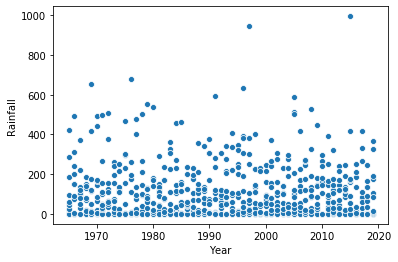

In [14]:
sns.scatterplot(df_rain["Year"], df_rain["Rainfall"])
plt.show()

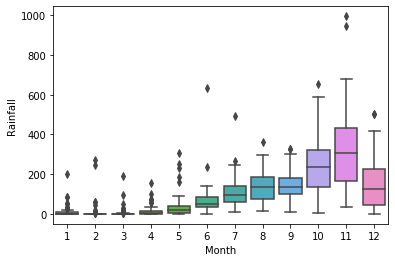

In [15]:
sns.boxplot(x=df_rain["Month"], y=df_rain["Rainfall"], data=df_rain)
plt.show()

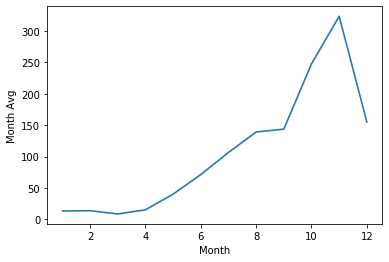

In [16]:
sns.lineplot(x=df_rain["Month"], y=df_rain["Month Avg"], data=df_rain)
plt.show()

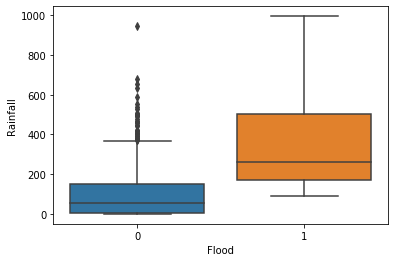

In [17]:
sns.boxplot(df_rain["Flood"], df_rain["Rainfall"])

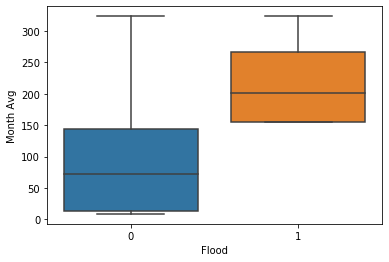

In [18]:
sns.boxplot(df_rain["Flood"], df_rain["Month Avg"])

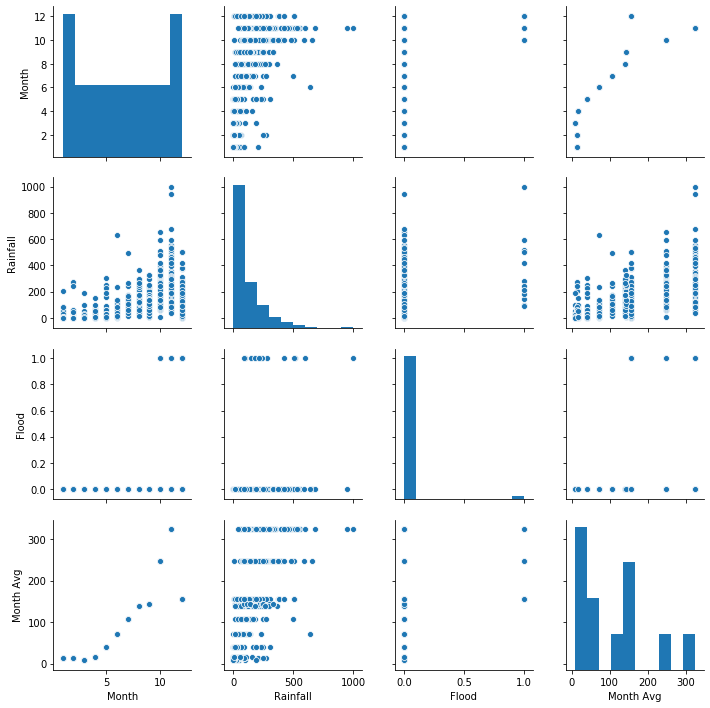

In [19]:
sns.pairplot(df_rain[["Month","Rainfall","Flood","Month Avg"]])

## Modelling

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = df_rain[["Month","Rainfall", "Month Avg"]]
Y = df_rain[["Flood"]]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state = 20 )

### Scaling

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Training

In [129]:
weights = {0:1.0, 1:40.0}
log_reg = LogisticRegression(solver='lbfgs', class_weight=weights)
log_reg.fit(X_train, y_train)

print("Training Acc:",log_reg.score(X_train, y_train)*100,"%")
print("Test Acc:",log_reg.score(X_test, y_test)*100,"%")

Training Acc: 80.0 %
Test Acc: 73.93939393939394 %


C:\Users\subha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix
 [[  7   0]
 [ 99 389]]


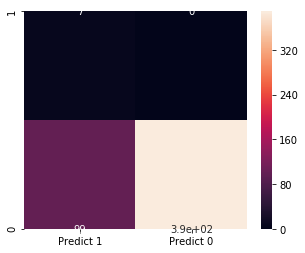

In [130]:
y_train_predict = log_reg.predict(X_train)

cm=metrics.confusion_matrix(y_train, y_train_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

print("Confusion Matrix\n",cm)
plt.figure(figsize = (5,4))
sns.heatmap(df_cm, annot=True)
plt.show()

### Testing

Confusion Matrix
 [[  5   0]
 [ 41 119]]


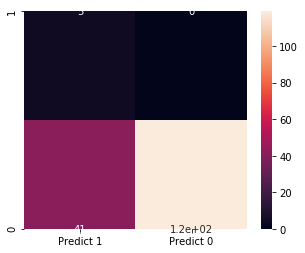

In [128]:
y_predict = log_reg.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

print("Confusion Matrix\n",cm)
plt.figure(figsize = (5,4))
sns.heatmap(df_cm, annot=True)
plt.show()

### Using whole data to fit model again

In [157]:
X = df_rain[["Month","Rainfall", "Month Avg"]]
Y = df_rain[["Flood"]]

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = scaler.transform(X)
X = scaler.transform(X)

weights = {0:1.0, 1:50.0}
log_reg = LogisticRegression(solver='lbfgs', class_weight=weights)
log_reg.fit(X, Y)

print("Training Acc:",log_reg.score(X, Y)*100,"%")

Training Acc: 76.81818181818181 %


C:\Users\subha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix
 [[ 12   0]
 [153 495]]


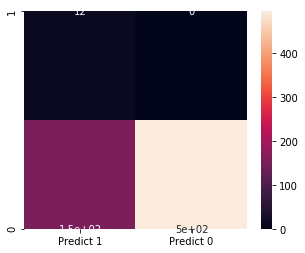

In [158]:
Y_Pred = log_reg.predict(X)

cm=metrics.confusion_matrix(Y, Y_Pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

print("Confusion Matrix\n",cm)
plt.figure(figsize = (5,4))
sns.heatmap(df_cm, annot=True)
plt.show()

In [159]:
l = [7, 301, 106]
x_q = np.asarray([l])

y_pred = log_reg.predict(x_q)

In [160]:
y_pred

array([1], dtype=int64)

##  Flood Prediction using Logistic Regression

In [182]:
# user input

month = 7
rainfall = 309
month_avg_in = month_avg.iloc[month-1]

input_data = [month, rainfall, month_avg_in]
x_query = np.asarray([input_data])

y_pred = log_reg.predict(x_query)

print("God-level ML\n")

print("Month:",month,"\nRainfall:",rainfall,"\nMonth_Avg_Rainfall:",month_avg_in)
if y_pred[0]==1:
    print("\nPrediction: Flood Occurs")
else:
    print("\nPrediction: Flood Doesn't Occurs")

God-level ML

Month: 7 
Rainfall: 309 
Month_Avg_Rainfall: 106.54727272727273

Prediction: Flood Occurs
